---
## Note from the Teachers:
We added a header with information about your project. 
This is useful since we want to keep a database of all the cool projects participants have made during the courses.
We will save the code in our database and host on github a page to show all the projects. Therefore it is more practical to add some information in the header of each notebook.
Thanks a lot for the understanding and for taking care of it.

You can delete this cell if you want

---

# Project Name (replace with your project name)
Project description (replace with your project description, you can use the same from the `INFO.md` file.

### Project Repo 
link (replace if you have your own repo, otherwise delete)

## Participants:
Please list here all the participants alongside with any information you may want to be visible. This will be hosted on a opencampus.sh repository, so if you want to keep a connection to your github user include this information here. 

### Course and Semester
Add here in which course and in which semester it was done.

### License
If you are releasing the software under some certain license, you can mention it and also include the `LICENSE.md` file in the folder

---

In [1]:
# Here you can start your code! Thanks

This is example code for the bakery data. You DO NOT need to use this.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

In [3]:
DATA_FOLDER = './../data/dataset1/'
SALES_DATA = 'sales.csv'
WEATHER_DATA = 'wheather.csv'
KIWO_DATA = 'kiwo.csv'

In [4]:
sales_df = pd.read_csv(os.path.join(DATA_FOLDER, SALES_DATA))
sales_df

,Date,Group,Sales
0,2013-07-01,1,148.828353
1,2013-07-02,1,159.793757
2,2013-07-03,1,111.885594
3,2013-07-04,1,168.864941
4,2013-07-05,1,171.280754
...,...,...,...
10864,2018-12-22,6,66.737353
10865,2018-12-23,6,49.958196
10866,2018-12-24,6,46.130749
10867,2018-12-27,6,51.623140


In [5]:
weather_df = pd.read_csv(os.path.join(DATA_FOLDER, WEATHER_DATA))
weather_df

,Date,Cloudiness,Temperature,Wind Speed,Weather Code
0,2012-01-01,8.0,9.8250,14,58.0
1,2012-01-02,7.0,7.4375,12,NaN
2,2012-01-03,8.0,5.5375,18,63.0
3,2012-01-04,4.0,5.6875,19,80.0
4,2012-01-05,6.0,5.3000,23,80.0
...,...,...,...,...,...
2596,2019-07-28,3.0,23.3500,14,5.0
2597,2019-07-29,6.0,25.2500,7,61.0
2598,2019-07-30,7.0,20.7375,8,61.0
2599,2019-07-31,6.0,20.4500,7,61.0


In [6]:
kiwo_df = pd.read_csv(os.path.join(DATA_FOLDER, KIWO_DATA))
kiwo_df

,Date,KielerWoche
0,2012-06-16,1
1,2012-06-17,1
2,2012-06-18,1
3,2012-06-19,1
4,2012-06-20,1
...,...,...
67,2019-06-26,1
68,2019-06-27,1
69,2019-06-28,1
70,2019-06-29,1


In [7]:
# check the values for a specific group
for group in range(0,6):
    print(f"we have {len(sales_df[sales_df['Group'] == (group+1)])} days for group {group+1}")

we have 2115 days for group 1
we have 2115 days for group 2
we have 2115 days for group 3
we have 2061 days for group 4
we have 2115 days for group 5
we have 348 days for group 6


<AxesSubplot:>

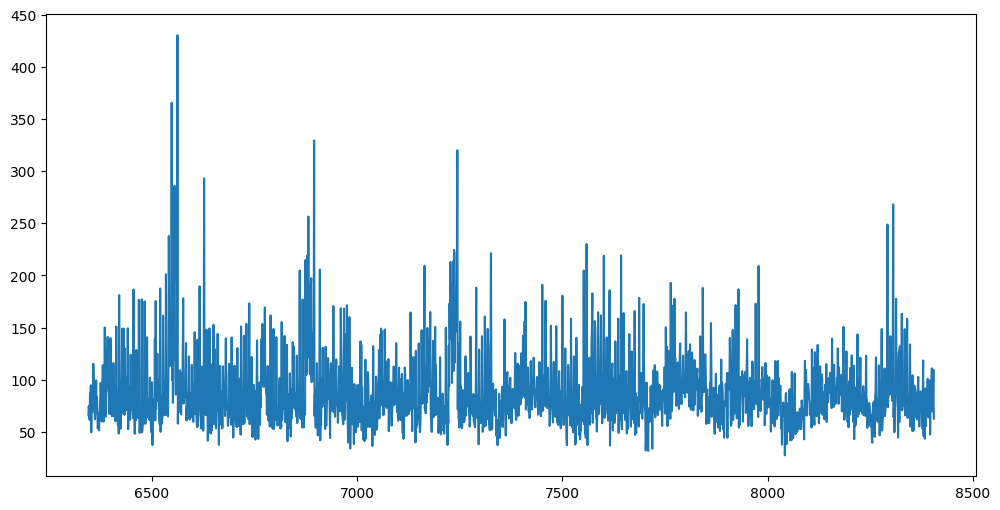

In [8]:
# plot some data using pandas
sales_df[sales_df['Group'] == (4)]['Sales'].plot(figsize=(12,6))

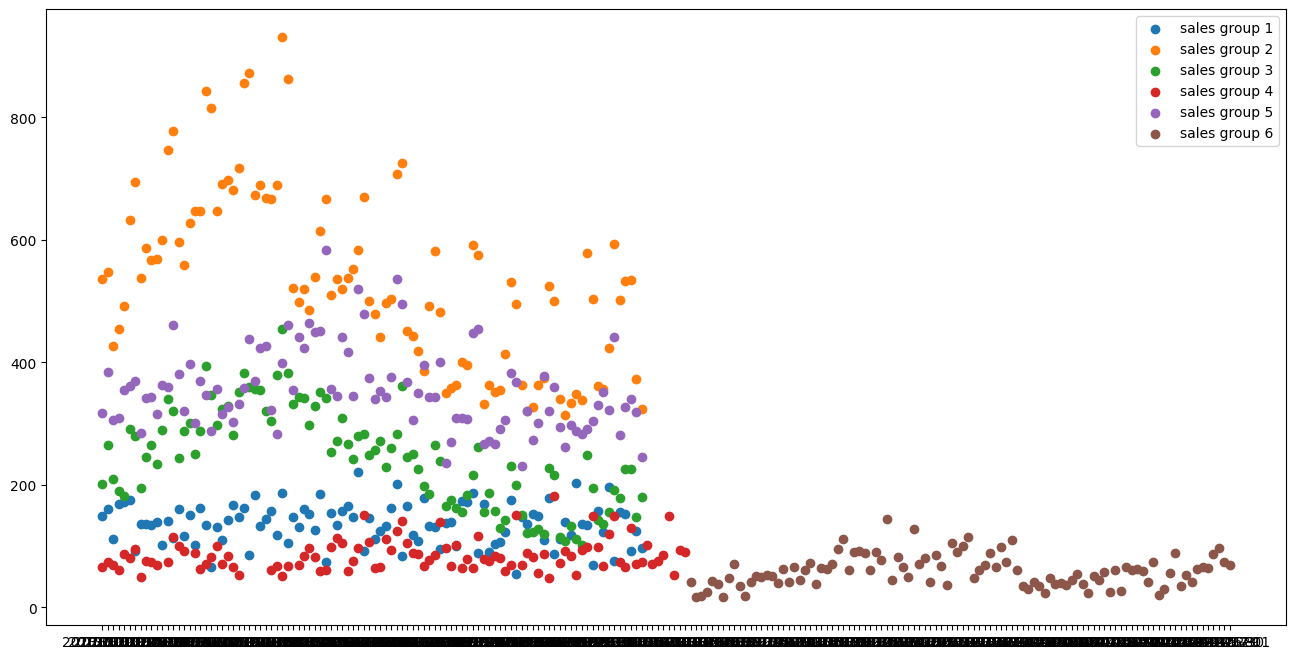

In [9]:
#plot 100 points of each sales group using matplotlib
plt.figure(figsize=(16,8))
for sale_nr in range(1, 7):
    current_sales = sales_df[sales_df['Group'] == (sale_nr)]
    plt.scatter(current_sales['Date'][0:100], current_sales['Sales'][0:100], label=f"sales group {sale_nr}")

plt.legend()

In [ ]:
# Create a standard time series
datetime = pd.date_range('2013-07-01', periods=2161, freq='D')
datetime

In [97]:
G1s = sales_df[sales_df['Group'] == (1)]
G1s = G1s.set_index(pd.to_datetime(G1s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G2s = sales_df[sales_df['Group'] == (2)]
G2s = G2s.set_index(pd.to_datetime(G2s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G3s = sales_df[sales_df['Group'] == (3)]
G3s = G3s.set_index(pd.to_datetime(G3s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G4s = sales_df[sales_df['Group'] == (4)]
G4s = G4s.set_index(pd.to_datetime(G4s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G5s = sales_df[sales_df['Group'] == (5)]
G5s = G5s.set_index(pd.to_datetime(G5s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G6s = sales_df[sales_df['Group'] == (6)]
G6s = G6s.set_index(pd.to_datetime(G6s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

,Group,Sales
2013-07-01,5.0,317.475875
2013-07-02,5.0,383.628682
2013-07-03,5.0,305.523072
2013-07-04,5.0,308.408168
2013-07-05,5.0,355.518770
...,...,...
2019-05-27,5.0,319.487926
2019-05-28,5.0,244.543724
2019-05-29,5.0,261.402964
2019-05-30,5.0,358.531072


In [107]:
# reindex weather dataframe to has equal time length as entire data - Missing values will be filled with NAN
kiwo_df = kiwo_df.set_index(pd.to_datetime(kiwo_df['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)
kiwo_df

,KielerWoche
2013-07-01,NaN
2013-07-02,NaN
2013-07-03,NaN
2013-07-04,NaN
2013-07-05,NaN
...,...
2019-05-27,NaN
2019-05-28,NaN
2019-05-29,NaN
2019-05-30,NaN


In [108]:
# reindex weather dataframe to has equal time length as entire data - Missing values will be filled with NAN
weather_df = weather_df.set_index(pd.to_datetime(weather_df['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)
weather_df

,Cloudiness,Temperature,Wind Speed,Weather Code
2013-07-01,6.0,17.8375,15.0,20.0
2013-07-02,3.0,17.3125,10.0,NaN
2013-07-03,7.0,21.0750,6.0,61.0
2013-07-04,7.0,18.8500,7.0,20.0
2013-07-05,5.0,19.9750,12.0,NaN
...,...,...,...,...
2019-05-27,6.0,15.2625,13.0,NaN
2019-05-28,6.0,13.1625,12.0,NaN
2019-05-29,3.0,13.3625,8.0,0.0
2019-05-30,7.0,14.0125,9.0,61.0


In [98]:
# create a standard dataframe to contain all timeseries data
df_standard= pd.DataFrame(datetime, columns=['Date'])
df_standard = df_standard.set_index(df_standard['Date']).drop(['Date'], axis=1).asfreq(freq='D')
df_standard['G1_Sales']= np.nan
df_standard['G2_Sales']= np.nan
df_standard['G3_Sales']= np.nan
df_standard['G4_Sales']= np.nan
df_standard['G5_Sales']= np.nan
df_standard['G6_Sales']= np.nan
df_standard['Cloudiness']= np.nan
df_standard['Temperature']= np.nan
df_standard['Wind Speed']= np.nan
df_standard['Weather Code']= np.nan
df_standard['KielerWoche']= np.nan

df_standard

,G1_Sales,G2_Sales,G3_Sales,G4_Sales,G5_Sales,G6_Sales,Cloudiness,Temperature,Wind Speed,Weather Code,KielerWoche
Date,,,,,,,,,,,
2013-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# consolidate all data into standard dataframe
for date in datetime:
    df_standard.loc[date]['G1_Sales'] = G1s.loc[date]['Sales']
    df_standard.loc[date]['G2_Sales'] = G2s.loc[date]['Sales']
    df_standard.loc[date]['G3_Sales'] = G3s.loc[date]['Sales']
    df_standard.loc[date]['G4_Sales'] = G4s.loc[date]['Sales']
    df_standard.loc[date]['G5_Sales'] = G5s.loc[date]['Sales']
    df_standard.loc[date]['G6_Sales'] = G6s.loc[date]['Sales']

    df_standard.loc[date]['Cloudiness'] = weather_df.loc[date]['Cloudiness']
    df_standard.loc[date]['Temperature'] = weather_df.loc[date]['Temperature']
    df_standard.loc[date]['Wind Speed'] = weather_df.loc[date]['Wind Speed']
    df_standard.loc[date]['Weather Code'] = weather_df.loc[date]['Weather Code']
    df_standard.loc[date]['KielerWoche'] = kiwo_df.loc[date]['KielerWoche']

df_standard

,G1_Sales,G2_Sales,G3_Sales,G4_Sales,G5_Sales,G6_Sales,Cloudiness,Temperature,Wind Speed,Weather Code,KielerWoche
Date,,,,,,,,,,,
2013-07-01,148.828353,535.856285,201.198426,65.890169,317.475875,NaN,6.0,17.8375,15.0,20.0,NaN
2013-07-02,159.793757,546.780787,265.261254,74.543917,383.628682,NaN,3.0,17.3125,10.0,NaN,NaN
2013-07-03,111.885594,427.343259,210.260241,69.262728,305.523072,NaN,7.0,21.0750,6.0,61.0,NaN
2013-07-04,168.864941,454.859641,190.686641,61.490175,308.408168,NaN,7.0,18.8500,7.0,20.0,NaN
2013-07-05,171.280754,492.818804,181.644870,86.759861,355.518770,NaN,5.0,19.9750,12.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-27,135.089885,343.556064,148.559756,108.839265,319.487926,NaN,6.0,15.2625,13.0,NaN,NaN
2019-05-28,154.363980,325.469954,143.560611,69.413548,244.543724,NaN,6.0,13.1625,12.0,NaN,NaN
2019-05-29,190.850121,410.842197,150.235794,85.864240,261.402964,NaN,3.0,13.3625,8.0,0.0,NaN


In [111]:
#replace all NAN values with 0
df_standard_ = df_standard.fillna(0)
df_standard_

,G1_Sales,G2_Sales,G3_Sales,G4_Sales,G5_Sales,G6_Sales,Cloudiness,Temperature,Wind Speed,Weather Code,KielerWoche
Date,,,,,,,,,,,
2013-07-01,148.828353,535.856285,201.198426,65.890169,317.475875,0.0,6.0,17.8375,15.0,20.0,0.0
2013-07-02,159.793757,546.780787,265.261254,74.543917,383.628682,0.0,3.0,17.3125,10.0,0.0,0.0
2013-07-03,111.885594,427.343259,210.260241,69.262728,305.523072,0.0,7.0,21.0750,6.0,61.0,0.0
2013-07-04,168.864941,454.859641,190.686641,61.490175,308.408168,0.0,7.0,18.8500,7.0,20.0,0.0
2013-07-05,171.280754,492.818804,181.644870,86.759861,355.518770,0.0,5.0,19.9750,12.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-27,135.089885,343.556064,148.559756,108.839265,319.487926,0.0,6.0,15.2625,13.0,0.0,0.0
2019-05-28,154.363980,325.469954,143.560611,69.413548,244.543724,0.0,6.0,13.1625,12.0,0.0,0.0
2019-05-29,190.850121,410.842197,150.235794,85.864240,261.402964,0.0,3.0,13.3625,8.0,0.0,0.0


In [25]:
G1s

,Group,Sales
Date,,
2013-07-01,1,148.828353
2013-07-02,1,159.793757
2013-07-03,1,111.885594
2013-07-04,1,168.864941
2013-07-05,1,171.280754
...,...,...
2019-05-27,1,135.089885
2019-05-28,1,154.363980
2019-05-29,1,190.850121


In [ ]:
# df_standard['G1_sales'] = G1s[sales_df['Group'] == (sale_nr)]
# df_standard['Date'] == G1s['Date']

ValueError: Can only compare identically-labeled Series objects